<div style="border:solid green 2px; padding: 20px">
<b>Александр, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.
Необходимо провести исследовательский анализ данных:
* 1) сколько фильмов выходило в прокат каждый год; 
* 2) данные о прокате известны не для всех фильмов, какова их доля?
* 3) как менялась динамика проката по годам. В каком году сумма сборов минимальная, а в каком максимальная?
* 4) влияют ли возрастные ограничения на сборы? какой рейтинговое ограничение фильма собрали больше всего? Меняется ли это в зависимости от года?
* 5) Изучить фильмы с господдержкой. Окупаются ли фильмы? Сколько средств выделяется? каков рейтинг этих фильмов?
 
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. 

</div>

## Обзор исходных данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt# импорт библиотеки pandas
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

In [67]:
fr =pd.read_csv('urbanization_rot.csv')

In [68]:
fr

,Country,Year,Population Type,Population
0,Afghanistan,1950-01-01,Urban,465127
1,Afghanistan,1951-01-01,Urban,486716
2,Afghanistan,1952-01-01,Urban,509649
3,Afghanistan,1953-01-01,Urban,534076
4,Afghanistan,1954-01-01,Urban,560158
...,...,...,...,...
27979,Viet Nam,2011-01-01,Rural,61250158
27980,Viet Nam,2012-01-01,Rural,61288018
27981,Viet Nam,2013-01-01,Rural,61322435
27982,Viet Nam,2014-01-01,Rural,61342809


In [2]:
df_1 = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv') # данные о прокатных удостоверениях
df_2 = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv') # данные о прокате в российских кинотеатрах
display (df_1.head(20))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,nan,nan,nan,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,nan,nan,nan,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,7.8,"мелодрама,комедия"


Таблица mkrf_movies (df_1) содержит информацию из реестра прокатных удостоверений(у одного фильма может быть несколько прокатных удостоверений).В df_1 содержаться следующие столбцы :
* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма.

Посмотрим количество пропусков в df_1:

In [3]:
pd.DataFrame(round((df_1.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
title,0
puNumber,0
show_start_date,0
type,0
film_studio,0.24
production_country,0.03
director,0.12
producer,7.59
age_restriction,0
refundable_support,95.57


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличный способ проверить доли пропущенных значений.

</div>

Как можно заметить, минимальное количество пропусков содержится в столбцах:

* 1) с названием студии съемки фильма (0,24%)
* 2) страны производства фильма (0,03 %)
* 3) режиссера картины (0,12 %)
Пропуски в этих столбцах вероятнее всего появились из-за частичной потери данных при наборе. Таких значений статистически очень мало, поэтому можно строки с пропусками в этих столбцах просто удалить.

Продюссер (7,59%), вероятно просто не был указан. Заменить на что либо не предоставляется возможным.

рейтинг (12,92%) - причин пропусков может быть множество, начиная от того что фильм не был представлен на киноПоиске - соответственно не может быть рейтинга, заканчивая намеренным сокрытием. Жанр (13,04%), вероятно фильм было трудно подвести под определенную категорию (набор категорий) - поэтому и пропуски. С этими пропусками можно поработать, однако в данном случае замены могут исказить качество исследования в дальнейшем, поэтому оставим все как есть.

Пропуски (95,57%) в следующих столбцах: `refundable_support`, `nonrefundable_support`, `financing_source`. Касаются только фильмов в которые вложило деньги государство. В данной таблице таких фильмов - 4,43%. При далнейшем анализе по фильмам с господдержкой следует создать новый df и работать с ним.  

### Данные о прокате

Рассмотрим df_2 (данные о прокате в российских кинотеатрах):

In [4]:
display (df_2.head(5))

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


Здесь содержатся следующие столбцы:

* puNumber — номер прокатного удостоверения;
* box_office — сборы в рублях.

In [5]:
pd.DataFrame(round((df_2.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
puNumber,0
box_office,0


Пропуков нет - отлично!

### Объединение исходных df

Отметим, что для простоты дальнейшей работы таблицы лучше объеденить в одну. Как можно заметить общий столбец `puNumber`.  Объеденим по нему, но прежде подведем все к одному типу данных - примем int64 (замена в df_1 и df_2).

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [7]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [8]:
df_1['puNumber'] = pd.to_numeric(df_1['puNumber'], errors='coerce').astype('Int64')
df_2['puNumber'] = pd.to_numeric(df_2['puNumber'], errors='coerce').astype('Int64')

In [9]:
df = df_1.merge(df_2, on='puNumber', how='outer') # создадим итоговый дата фрейм df c которым в последствии будем работать

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7485 non-null Int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: Int64(1), float64(4), object(11)
memory usage: 1001.5+ KB


Как видим полученный df содержит все столбцы двух таблиц - объединение прошло успешно.

**Вывод по разделу**

В данном разделе были проведены следующие действия:

* 1) Поставлена задача проекта;
* 2) Первичный обзор данных;
* 3) Намечены пути обработки пропусков;
* 4) Объеденены исходные таблицы в один df.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Достаточно детально изучили наши первичные данные, давай теперь их обработаем. 
</div>

## Предобработка данных

В данном разделе поработаем над следующим:

* 1) Замена типов данных;
* 2) Работа с пропусками;
* 3) Поиск дубликатов;
* 4) Изучение категориальных переменных
* 5) Проверка количественных значений
* 6) добавление новых столбцов: имя фамилия первого режиссера, основной жанр фильма

### Проверка типов данных

В данном подразделе замени типы данных в df, чтобы в дальнейшем упростить работу.

Еще раз вызовем df.info()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7485 non-null Int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: Int64(1), float64(4), object(11)
memory usage: 1001.5+ KB


In [12]:
df.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама",nan
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный",nan
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan


Данные столбцы оставим, такими какие они и есть (то есть строковые). Они содержат текст и с ними ничего не сделаешь, да оно и не нужно:

`film_studio`

`title`

`type`

`production_country`

`director`

`producer`

`age_restriction`

`genres`

`financing_source`

Из оставшихся столбцов, которые стоит привести к числовому формату осталcя: (`puNumber` - приводился к Int64 немного ранее при объединении двух таблиц) 

`ratings` - привести к float64

Обратим внимание на него внимание:

In [13]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Как можно увидеть, здесь помимо числовых значений встречаются процентные. Насколько мне известно киноПоиск считает в числах - поэтому процентные значения не корректны! 

Отмечу в **баг репорт**, причина такого может быть связана с тем, что рейтинг брался не только с киноПоиска , либо внутренние ошибки на сервере! При преобразовании формата, **данные которые содержат процентный рейтинг будут потерены - поэтому на будущее для получения более качественных и объективных ответов на вопросы стоит над этим поработать!** 

In [14]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce').astype('float64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7485 non-null Int64
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6490 non-null float64
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: Int64(1), float64(5), object(10)
memory usage: 1001.5+ KB


Стоит привести столбец с датой к формату даты:

In [16]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y.%m.%d')

**Вывод**

Данные, содержащие числовые значения были преобразованы к соответствующим форматам.

Проблемным оказался столбец `ratings` - разный формат рейтинга, к сожалению были утерены процентные рейтинги.

### Изучение пропусков в датафрейме

Пропуски были рассмотрены в начале работы, напишем еще раз выводы здесь:

Как можно заметить, минимальное количество пропусков содержится в столбцах:

1) с названием студии съемки фильма (0,24%)

2) страны производства фильма (0,03 %)

3) режиссера картины (0,12 %) Пропуски в этих столбцах вероятнее всего появились из-за частичной потери данных при наборе. Таких значений статистически очень мало, поэтому можно строки с пропусками в этих столбцах просто удалить.

Продюссер (7,59%), вероятно просто не был указан. Заменить на что либо не предоставляется возможным.

рейтинг (12,92%) - причин пропусков может быть множество, начиная от того что фильм не был представлен на киноПоиске - соответственно не может быть рейтинга, заканчивая намеренным сокрытием. Жанр (13,04%), вероятно фильм было трудно подвести под определенную категорию (набор категорий) - поэтому и пропуски. С этими пропусками можно поработать, однако в данном случае замены могут исказить качество исследования в дальнейшем, поэтому оставим все как есть.

Пропуски (95,57%) в следующих столбцах: `refundable_support`, `nonrefundable_support`, `financing_source`. Касаются только фильмов в которые вложило деньги государство. В данной таблице таких фильмов - 4,43%. При далнейшем анализе по фильмам с господдержкой следует создать новый df и работать с ним.

в сфере кино менять на некие средние значения и логически подходящие значения не предоставляется возможным - все данные весьма однозначны - поэтому ограничимся только удалением строк, где содержится минимальное количество пропусков.

In [17]:
df.dropna(subset = ['production_country', 'film_studio','director'], inplace = True) #удаление строк, 
#где в столбцах 'film_studio','production_country', 'director', где в столбцах имеются пропуски

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Я бы рекомендовал не использовать атрибут `inplace`, так как в последующих обновлениях библотеки `pandas` он будет удален.
    
Лучше всего переопределять переменные. 
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Хорошо, что оценили доли пропущенных значений и удалили только те пропуски, которые занимают менее 1%, так мы не теряем много данных.
</div>

Проверим удалились ли пропуски в столбцах:

In [18]:
df['production_country'].isna().sum()

0

In [19]:
df['film_studio'].isna().sum()

0

In [20]:
df['director'].isna().sum()

0

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Также рекомендую подписывать с помощью текста расчетные значения, ведь так быстрее понять что мы хотели посчитать.
    
В этом нам поможет метод `format`, который является стандартным в языке `python`.
    
Оставил пример ниже.
    
</div>

In [21]:
print("Количество пропусков: {}".format(df['director'].isna().sum()))

Количество пропусков: 0


### Изучение дубликатов в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Посмотрим дубликаты в df

In [22]:
df.duplicated().sum() # явные дубликаты

0

Как можно заметить абсолютно явных дубликатов нет, поэтому рассмотрим столбцы в которых могут быть повторяющиеся значения и их однозначно можно интерпретировать таковыми. Не название киностудии и не имя режиссера, бюджет... - они могут быть участниками разных филльмов, а совпадения возможны. 

Поэтому обратим внимание на `title` и `puNumber` - тут значения должны быть заведомо уникальными.

In [23]:
df['title'].duplicated().sum()

713

Как видим фильмов с одним названием, но при этом имеющих более одной строчки с информацией в достатке, посчтитаем:

In [24]:
df['title'].value_counts()

День святого Валентина_                                          5
Кошки против собак: Месть Китти Галор                            4
Не брать живым /По книге Раджива Чандрасекарана/                 4
Лузеры                                                           4
Начало_                                                          4
                                                                ..
Баския: Взрыв реальности                                         1
Пустошь.                                                         1
Сделано в Америке                                                1
Жизнь Пи /По произведению Янна Мартела/ (на английском языке)    1
Не бойся, я с тобой! 1919                                        1
Name: title, Length: 6746, dtype: int64

Возьмем любой фильм, где строчек с тнформацией больше 1. Пусть будет "Кошмар на улице Вязов /Фильм ужасов/", через query() посмотрим в чем разница между записями:

In [25]:
df.query('title == "Кошмар на улице Вязов /Фильм ужасов/"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3922,Кошмар на улице Вязов /Фильм ужасов/,121008110,2010-04-27 12:00:00+00:00,Художественный,"Нью Лайн Синема, Платинум Данс, Уорнер Бразерс",США,Сэмюэл Байер,Майкл Бэй,«18+» - запрещено для детей,nan,nan,nan,NaN,7.70,ужасы,nan
4139,Кошмар на улице Вязов /Фильм ужасов/,221097810,2010-08-19 12:00:00+00:00,Художественный,"Нью Лайн Синема, Платинум Данс, Уорнер Бразерс",США,Сэмюэл Байер,Майкл Бэй,«18+» - запрещено для детей,nan,nan,nan,NaN,7.70,ужасы,nan
4838,Кошмар на улице Вязов /Фильм ужасов/,221017111,2011-01-27 12:00:00+00:00,Художественный,"Нью Лайн Синема, Платинум Данс, Уорнер Бразерс",США,Сэмюэл Байер,Майкл Бэй,«18+» - запрещено для детей,nan,nan,nan,NaN,7.70,ужасы,nan
5348,Кошмар на улице Вязов /Фильм ужасов/,221088410,2010-09-21 12:00:00+00:00,Художественный,"Нью Лайн Синема, Платинум Данс, Уорнер Бразерс",США,Сэмюэл Байер,Майкл Бэй,«18+» - запрещено для детей,nan,nan,nan,NaN,7.70,ужасы,nan


Как можно заметить все данные для фильма абсолютно одинаковые, за исключением номера прокатного удостоверения и даты начала показа. Предпологаю, что это связано с особенносятми выдачи прокатных удостверений Министерством - их либо дают на определенный срок и в случае популярности продлевают, либо для каждого региона нужны свои прокатные удостоверения. Также стоит заметить что год 2011 самый большой - вероятно старая система присваивания. 

В рамках исследования разница в номерах прокатного удостовернеия для одного и того же фильма не имеет значения, поэтому такие фильмы разумнее свести к одной единственной записи - конечный результат исследования будет объективнее: 

In [26]:
df = df.drop_duplicates(subset = ['title'])

In [27]:
df['title'].duplicated().sum()

0

Посмотрим дубликаты в `puNumber`:

In [28]:
df['puNumber'].duplicated().sum()

0

Здесь дубликатов нет. В других столбцах дубликаты так очевидно найти не получится.

**Вывод**

Дубликаты фильмов с одним названием удалены, при разных номерах прокатных удостоверений удалены - на качестве исследования это не должно отразиться.

### Изучение категориальных значений

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Выделим все столбцы которые можно отнеси к "категориальным", это :

`type`,
`age_restriction`,
`genres`,
`financing_source`.

Рассмотрим столбец `type`:

In [29]:
df['type'].value_counts()

Художественный                3924
 Художественный               1345
Анимационный                   766
Прочие                         385
Документальный                 275
Научно-популярный               49
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

Как можно заметить есть по две вариации написании "Художественный" и "Анимационный" , это произошло из-за опечаток - при наборе данных ставили пробел. Исправим при помощи: `str.strip()`

In [30]:
df['type'] = df['type'].str.strip()

In [31]:
df['type'].value_counts()

Художественный                5269
Анимационный                   767
Прочие                         385
Документальный                 275
Научно-популярный               49
Музыкально-развлекательный       1
Name: type, dtype: int64

Все изменения прошли успешно!

Рассмотрим столбец `age_restriction`:

In [32]:
df['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2510
«12+» - для детей старше 12 лет           1472
«18+» - запрещено для детей               1423
«0+» - для любой зрительской аудитории     741
«6+» - для детей старше 6 лет              600
Name: age_restriction, dtype: int64

Ничего подозрительного нет.

Рассмотрим столбец `genres`:

In [33]:
df['genres'].value_counts()

драма                               448
комедия                             328
мелодрама,комедия                   181
драма,мелодрама                     170
драма,мелодрама,комедия             167
                                   ... 
приключения,вестерн,боевик            1
аниме,мультфильм,короткометражка      1
детектив,боевик,история               1
криминал,боевик,комедия               1
драма,вестерн,приключения             1
Name: genres, Length: 741, dtype: int64

Комбинаций жанров очень много - очевидных проблем не видно.

Рассмотрим столбец `financing_source`:

In [34]:
df['financing_source'].value_counts()

Министерство культуры               163
Фонд кино                           144
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

Очевидных проблем тоже не видно.

**Вывод**

Обозначенные в задании проблеммы в категориальных столбцах мною не замечены.

В столбце `type` были значения содержащие одну и ту же информацию, однако написанные в некоторых случаях через пробел - исправлено.

### Проверка количественных значений

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Выделим все столбцы которые можно отнеси к "количественным", это :

`refundable_support`,
`nonrefundable_support`,
`budget`,
`box_office`.

Как было указанно в задании стобец `budget` может содержать средства из `nonrefundable_support` и `refundable_support`, можно предпологать что для некоторых фильмов общий бюджет окажется меньше, чем сумма этих столбцов - проверим: 

In [35]:
df.loc[(df['nonrefundable_support'] + df['refundable_support']) > df['budget']].count()

title                    17
puNumber                 17
show_start_date          17
type                     17
film_studio              17
production_country       17
director                 17
producer                 17
age_restriction          17
refundable_support       17
nonrefundable_support    17
budget                   17
financing_source         17
ratings                  16
genres                   16
box_office               17
dtype: int64

Всего таких фильмов получилось 17 - ошибки при наборе, для таблицы такого размера ничтожно мало. Однако фильмов с господдержкой было порядка 5%, поэтому заменим ошибочные значения в столбце `budget` суммой средств из источников с господдержкой:

In [36]:
df.loc[(df['nonrefundable_support'] + df['refundable_support']) > df['budget'],'budget']\
= df['nonrefundable_support'] + df['refundable_support']

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Хорошо, что используем метод `loc` для множественной фильтрации, потому что он работает быстрее и читается проще.
    

    
</div>

In [37]:
df.loc[(df['nonrefundable_support'] + df['refundable_support']) > df['budget']].count()

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

Замена прошла успешно.

**Вывод**

Были обнаружено, что у некоторых фильмов общий бюджет был меньше средств из фондов господдержки. Такого быть не может - ошиблись при наборе , не критично. Стоит заметить что общий бюджет мог бы быть и больше, но нам не известно были ли другие источники финансирования. Но все же такой подход - лучшее что можно было сделать.

### Добавление новых столбцов





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [38]:
df['year'] = pd.DatetimeIndex(df['show_start_date']).year

In [39]:
df['year'].head(5)

0    2015
1    2016
2    2016
5    2016
6    2013
Name: year, dtype: int64

Успешно добавлено!

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

Создадим функцию, которая будет брать значения из столбца до запятой:

In [40]:
def new_column(data):
    split_text = data.split(',', maxsplit =1)
    return split_text[0]

Применем функцию к столбцу с режиссером:

Для проверки возьмем фильм "Неподсуден", там было заявлено 2 режиссера:

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

С разделением данных справились, отлично.
    
В том числе можем использовать метод ниже от библиотеки `pandas`, не сказал бы что он быстрее, но можно иметь в виду как альтернативу.
    
</div>

In [41]:
df['director'].str.split(',').explode()

0           Кевин Костнер
1               Е.Матвеев
2       Тимур Бекмамбетов
5            В.Абдрашитов
6               В.Меньшов
              ...        
7481          Фил Грабски
7482           Ник Пауэлл
7483     Чарльз Е.Бастьен
7484             А.Беляев
7485             И.Трусов
Name: director, Length: 8403, dtype: object

In [42]:
df.query('title == "Неподсуден"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
19,Неподсуден,111003716,2016-02-12 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,7.70,драма,420.00,2016


Как видим первый режиссер картины добавился в новый столбец.

Применем функцию к столбцу с жанрами, однако учтем что в столбце с жанрами было 13,6% пропусков. Поэтому при добавлении будем отсекать пропуски.

In [43]:
df['main_genre'] = df.genres.dropna().apply(new_column)

Для проверки возьмем фильм "осенний марафон"

In [44]:
df.query('title == "Осенний марафон"')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_genre
16,Осенний марафон,111007513,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Данелия,NaN,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,8.00,"драма,мелодрама,комедия",nan,2013,драма


Добавление главного жанра в новый столбец прошло успешно.

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [45]:
df['ratio'] = (((df['refundable_support'] + df['nonrefundable_support']) / df['budget']) * 100).round(2)

Проверим добавился ли новый столбец:

In [46]:
df.query('ratio > 0')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_genre,ratio
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,драма,33.37
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,nan,NaN,28140.00,2014,NaN,70.00
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,комедия,61.27
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50,2014,драма,69.01
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00,2014,драма,62.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7456,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.00,35000000.00,160000000.00,Фонд кино,6.80,комедия,3073568690.79,2019,комедия,37.50
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,400000000.00,980000000.00,Фонд кино,6.00,"история,биография,драма",717703185.53,2019,история,51.02
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,0.00,190000000.00,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00,2019,мультфильм,52.63
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,30000000.00,46154000.00,Министерство культуры,5.90,драма,nan,2019,драма,65.00


Новый столбец был успешно добавлен.

**Вывод**

Были добавлены новые столбцы:
`ratio`,`year`,	`first_director`, `main_genre`

**Вывод по разделу**

В рамках работ по предобработке данных были проведены следующие действия:

* 1) Заменены типы данных;
* 2) Проведены работы с пропусками данных (удалены столбцы с пропусками меньше 1%);
* 3) Проведены работы с дубликатами ( были удалены фильмы у которых было одно название, но разные номера прокатных удостворений)
* 4) В категориальных значениях поправлены значения с пробелами - приведены к единому регистру;
* 5) в количественных - поправлены значения в столбце `budget`, где итоговый бюджет ( по фатку стояли 0) был меньше средств государства;
* 6) добавлены новые столбцы: `ratio`,`year`,	`first_director`, `main_genre`

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Что ж, достаточно детально обработали пропуски в наших данных, пожалуй теперь можно переходить к анализу.
    
</div>

## Исследовательский анализ данных


В данном разделе будем отвечать на поставленные вопросы в начале исследования:

* 1) Сколько фильмов выходит в прокат каждый год?
* 2) Какова динамика проката по годам?
* 3) Влияние возрастного рейтинга на сборы фильмов;
* 4) Сколько выделяют средств на поддержку кино. Проверить, хорошо ли окупаются такие фильмы, какой у них рейтинг.

### Количесвто фильмов выходящих каждый год

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Вспомним, что изначально у нас было 2 таблицы с данными : `mkrf_movies` и `mkrf_shows`, вторая содержала информацию о прокате в российских кинотеатрах (она была меньше первой примерно в 2 раза!) - то есть фильмы которые после получения прокатного удостоверения точно показывались в кинотеатре, первая же содержала информацию о всех фильмах получавших прокатное удостоверение, но не факт что показывалось. Так как мы объеденяли эти таблицы в один единый df отфильтровать по `puNumber` (номер прокатного удостоверения) не получится, но обратим внимание на столбец `box_office` - он был из 2ой таблицы, соответственно после объединения строки где была указана информация остались в первозданном виде ( те фильмы где были прокатные удостоверения, но их не было во второй таблицы - столбец `box_office` принял значения `'nan'`). 

Поэтому что бы ответить на вопрос : "Сколько фильмов выходило в прокат по годам?", стоит отбросить с помощью query() все отсутствующие значения в `box_office`:

In [47]:
df_filter = df.query('box_office >0')

Теперь на основании нового df_filter можно построить столбчатую диаграмму распределения:

In [48]:
df_filter.pivot_table(index = 'year', 
                      values = 'title', aggfunc ='count')


,title
year,
2010,84
2011,98
2012,110
2013,171
2014,251
2015,428
2016,499
2017,356
2018,471


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда график и его оси подписаны 😊👍
    
Так быстрее понять о чем идёт речь на самом графике.
    
</div>

По диаграмме можно заметить следующее: 

* 1) до 2012 в целом на экраны выходило порядка 100 фильмов в год;
* 2) с 2013 по 2015 был сильный рост с темпами, порядка, в 2 раза больше вышедших на экраны картин год к году;
* 3) в 2017 году было небольшое падение к уровню середины 2014 года;
* 4) с 2017 года рост продолжился и в 2019 году достиг своего пика - тенденция остается растущей ( информации о следующих годах нет).

Посмотрим долю фильмов не вышедших фактически в прокат ( во всяком случае не имеем информации о том, что они показывались в кинотеатрах)

In [49]:
info = (df['box_office'].count())/(df['title'].count())
display('Количество фильмов о которых есть информация о прокате: {:.2%}'.format(info))

'Количество фильмов о которых есть информация о прокате: 44.68%'

Меньше половины от всех фильмов имеют информацию о сборах - **посредственный результат**. Сборщикам информации стоило бы обратить на это особое внимание! Отмечу в **баг репорт**

Вижу 4 причины этому:

* 1) много фильмов было отбраковано непосредственно перед выходом на экраны;
* 2) фильм не был доснят;
* 3) фильму не дали выйти на экраны из-за некторой негласной цензуры;
* 4) плохо собирается информация о сборах;

**Вывод**

В целом можно сказать, что рынок съемки кино развивается положительными темпами - рост положительный и динамичный. Думаю этому способствует развитие компьютерной графики - упрощающей процесс производства фильмов, как финансово, так и по времени. 

Однако стоит заметить, по моему мнению, качество самого кино в последнее время очень сильно страдает - причем это характерно для любой страны! Косвенно об этом можно судить по количеству картин имевших сборы де факто. Многие картины не доходят до кинотеатра ( страшно представить, что там такое отсняли то).

### Динамика проката год к году

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

Начнем изучение с построения графика динамики сборов:

Text(0.5, 1.0, 'График суммы сборов по годам')

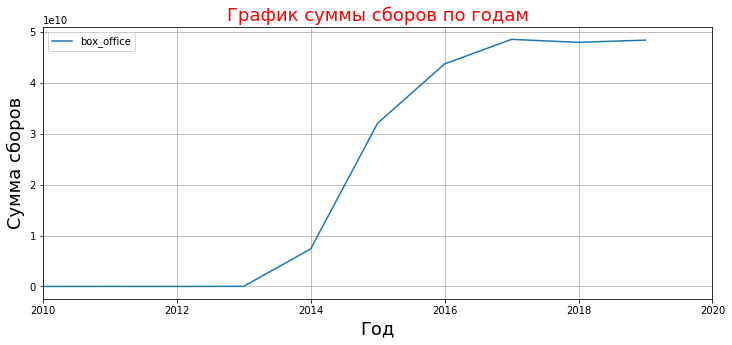

In [50]:
df_box = df_filter.pivot_table(index = 'year', 
                      values = 'box_office', aggfunc ='sum'
).plot(
       grid = True,
       xlim = (2010, 2020),
       figsize = (12, 5) )
plt.xlabel('Год', fontsize = 18)
plt.ylabel('Сумма сборов', fontsize = 18)
plt.title('График суммы сборов по годам', fontsize = 18, color = 'red')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Если вдруг тебе понравилась тема визуализации, рекомендую посмотреть на библиотеку `seaborn` 
    
</div>

График можно разделить условно на 3 участка:

* 1) до 2013 года сумма сборов ничтожна мала (относительно следующих годов);
* 2) 2013-2017. Активный и динамичный рост и в 2017 году максимальная сумма сборов;
* 3) 2017 и далее практически ровная прямая;

Рассмотрим максимальную и минмальную сумму сборов:

In [51]:
df_box = df_filter.pivot_table(index = 'year', 
                      values = 'box_office', aggfunc =['sum']
)
df_box.columns = ['sum']
max_box =df_box.query('sum == sum.max()')
min_box =df_box.query('sum == sum.min()')
display('максимальная сумма сборов: {:}'.format(max_box))
display('минимальная сумма сборов: {:}'.format(min_box))


'максимальная сумма сборов:                 sum\nyear               \n2017 48561554266.51'

'минимальная сумма сборов:             sum\nyear           \n2010 2374340.00'

Максимум был в 2017 году (48.5 млрд руб.)

Минимум был в 2010 году (2.37 млн руб.)

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [52]:
df_filter.pivot_table(index = 'year', 
                      values = 'box_office', aggfunc =['mean','median']
).style.highlight_max(color='red')\
.highlight_min(color='blue').format("{:.2f}")

,mean,median
,box_office,box_office
year,,
2010,28265.95,2085.00
2011,142289.69,3042.50
2012,58370.55,6837.50
2013,174084.98,3880.00
2014,29372902.68,28150.00
2015,74964135.18,4398303.75
2016,87637775.88,3659719.50
2017,136408860.30,10177833.50


Для каждого года характерен огромный разрыв между медианой и средним значением - это указыват на то что есть разрыв между сборами разных фильмов. Есть блокбастеры собирающие огромные суммы, а есть режиссерские картины, со слабой финансовой поддержкой, для узкого круга зрителей - сумма сборов минимальна или же абсолютно провалившиеся картины.

**Вывод**

Подтверждаются выводы прошлого пункта (количество снимаемых картин выросло) - растет и собираемость средств. В 2013-2017 году был рост сборов ( количество снимаемых картин также росло).
Есть большой разрыв в количестве сборов между малобюджетными картинами  и блокбастерами.

Рынок кино рос до 2017 года, после остается на одном уровне.

Абсолютно доверять этим графикам и цифрам ( особенно до 2015 ) не стоит - вероятно огромное количесвто пропусков и недостоверной информации. Конечные результаты сильно искажаются. Я думаю это связано с тем, что система учета сборов в более совершеннном виде появилась как раз в это время.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличный способ отобразить минимальные и максимальные значения 👍
    
</div>

### Влияние возрастного рейтинга

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Первым делом отсечем все значения по году ранее 2015 года.

Далее построим столбчатую диаграмму, где по оси абсцисс будут значения возрастных категорий, а по оси ординат сумма сборов:

Text(0.5, 1.0, 'График суммы сборов по годам в зависимости от возрастной категории')

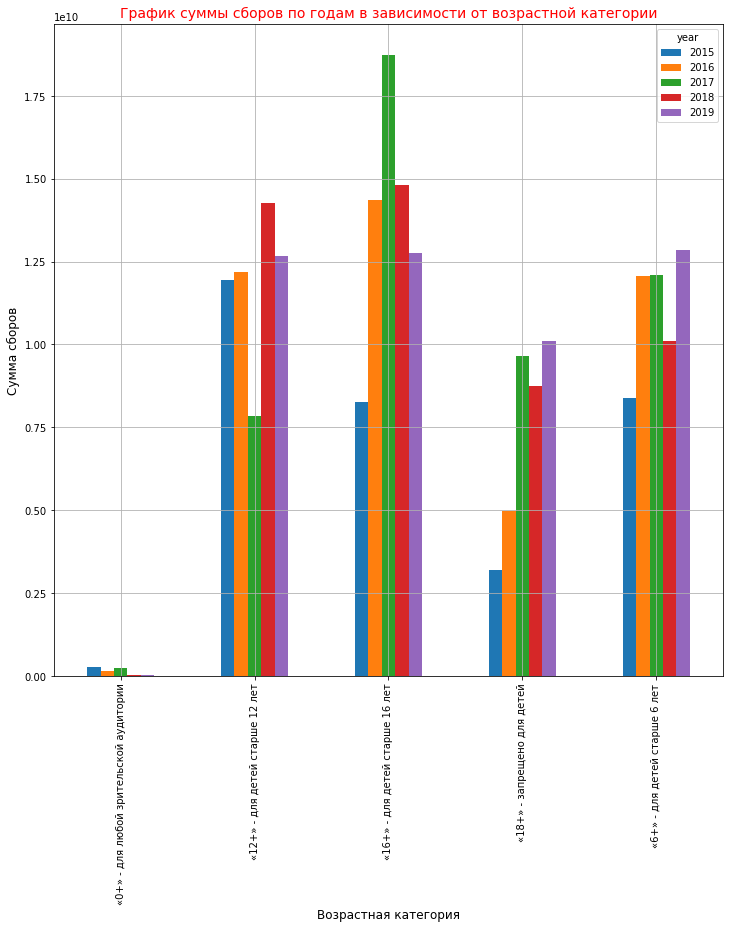

In [53]:
df_year_filter = df_filter.query('year >=2015') # отсечем все года ранее 2015 года

a = df_year_filter.pivot_table(index = 'age_restriction', columns='year',
                      values = 'box_office', aggfunc ='sum'
).plot(kind = 'bar',
       grid = True,
       xlim = (2015, 2020),
       figsize = (12, 12) )
plt.xlabel('Возрастная категория', fontsize = 12)
plt.ylabel('Сумма сборов', fontsize = 12)
plt.title('График суммы сборов по годам в зависимости от возрастной категории', fontsize = 14, color = 'red')
 

По графику видим следующее:

* 1) Возрастная категория 0+ - собирает в прокате значительно меньше чем все;
* 2) Возрастная категория 18+ - на втором месте после 0+. Думаю это объясняется тем, что в эту категорию попадают сложные (жестокие, психологические, с элемнтами эротически...) фильмы, которые в большинстве своем людям не так интересны;

Скорее всего в "золотую середину" попадают фильмы категории 16+ - они в большинстве своем об интересных вещах (приключения, фэнтези...), но при этом не столь заморочены, как те, которые попали в категорию 18+. Собственно поэтому и 16+ по большинству годов самые кассовые;
* 3) Категория 12+ вторая по сборам после 16+ . В 2015 году даже были самыми большимы по сборам. Думаю в этой категории много анимационных картин, которые также интересны многим людям;
* 4) категория 6+ третья по собираемости. Мультики , их любят не только дети.

Посмотрим в цифрах, в какой из возрастных категорий собираемость по годам была максимальной: 

In [54]:
df_year_filter.pivot_table(index = 'age_restriction', columns='year',
                      values = 'box_office', aggfunc ='sum')\
.style.highlight_max(color='red')\
.highlight_min(color='blue').format("{:.2f}")

year,2015,2016,2017,2018,2019
age_restriction,,,,,
«0+» - для любой зрительской аудитории,273367767.78,149989021.67,229598930.00,32449002.11,17746066.82
«12+» - для детей старше 12 лет,11957220583.41,12178337053.01,7851427660.67,14267250435.69,12676553693.67
«16+» - для детей старше 16 лет,8274253188.89,14359349614.80,18742889949.06,14820922307.93,12748542668.10
«18+» - запрещено для детей,3184097942.98,4990430064.62,9651495581.02,8745355942.14,10114009267.16
«6+» - для детей старше 6 лет,8395710375.31,12053144408.24,12086142145.76,10104974623.41,12852548650.86


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что наши действия повторяются. 
    
Это говорит о том, что мы можем создать функцию для форматирования таблиц. Тем самым удалить дубли кода и оптимизировать наш код.
    
</div>

Выводы аналогичны графикам:

* 1) В 2015 году самыми собираемыми были картины с возрастным ограничением 12+ (11,9 млрд руб.);
* 2) С 2016 по 2018 год 16+ были самыми популярными ( от 14,3 млрд до 18,7 млрд) ;
* 3) В 2019 году вырывается рейтинг 6+ - вероятно к 2019 многие дети достигли этого возраста - пошли в кино. Либо в 2019 году вышли на экраны много успешных кассовых картин, которые попали в этот рейтинг. Однако стоит заметить, что фильмы для 16+ очень близки этому значению - поэтому думаю такое значение случайное.

**Вывод**

В целом можно сказать, что рейтинг 16+ - делает самые большие кассы. Это не удивительно , уверен это самое большое количество отснятых фильмов во все времена, поэтому их смотрит большое количество людей.

Можно сказать, что рейтинг влияет на собираемость - однако не известно насколько на практике соблюдаются нормы при продаже билетов в кинотеатрах. Объективно в возрастном рейтинге ничего плохого нет, однако зачустую не понятно насколько объективно этот рейтинг присваивается.

### Исследование фильмов, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

#### Интересы зрителей и окупаемость фильмов

Первым делом выберем все фильмы, в которых была доля государственного финансирования. Возьмем столбец `ratio`, где отсечем все значения <= 0:

In [55]:
df_gos = df.query('ratio > 0')

Далее, дополнительно создадим новую колонку, где будут содержаться категории в зависимости от значений столбца `ratio`. Так как значения этого столбца лежит в пределах 0-100, поэтому выберем 4 интервала: до 25%, до 50%, до 75% , >75% и соответсвенно будем присваивать категории: Низкий, умеренный, высокий, определяющий. 

Напишем функцию:

In [56]:
def category(share):
    if share <=25:
        return 'Низкий уровень господдержки'
    elif share <=50:
        return 'Умеренный уровень господдержки'
    elif share <=75:
        return 'Высокий уровень господдержки'
    return 'Определяющий уровень господдержки'
    

Создадим новый столбец на основе функции `category(share)`:

In [57]:
df_gos['ratio_category'] = df_gos['ratio'].apply(category) 
# добавим к исходному df новый столбец, который будет содержать результаты работы функции сверху

Проверим добавился ли столбец:

In [58]:
df_gos.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_genre,ratio,ratio_category
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,26500000.00,79411900.00,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,драма,33.37,Умеренный уровень господдержки
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,26000000.00,37142857.00,Министерство культуры,nan,NaN,28140.00,2014,NaN,70.00,Высокий уровень господдержки
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,107847945.00,176023490.00,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,комедия,61.27,Высокий уровень господдержки
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,28000000.00,40574140.00,Министерство культуры,4.20,драма,55917.50,2014,драма,69.01,Высокий уровень господдержки
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,25000000.00,40015122.00,Министерство культуры,6.40,драма,232100.00,2014,драма,62.48,Высокий уровень господдержки


Столбец добавлен!

Составим сводную таблицу, где посмотрим рейтинг фильма в зависимости от уровня поддержки:

In [59]:
df_gos.pivot_table(index = 'ratio_category',
                      values = 'ratings', aggfunc ='median')\
.style.highlight_max(color='red')\
.highlight_min(color='blue').format("{:.2f}")

,ratings
ratio_category,
Высокий уровень господдержки,6.20
Низкий уровень господдержки,6.25
Определяющий уровень господдержки,5.70
Умеренный уровень господдержки,6.20


Как бы ни было странно, но фильмы с низким уровнем господдержки обладают наилучшим рейтингом (6.25), стоит заметить что рейтинг все равно низковат, а фильмы с определяющим уровнем - 5.7 уже очень близко к "мусорному".

Вывод на следующем этапе. Посмотрим теперь на окупаемость фильмов - напишем еще одну функцию которая будет определять окупился ли фильм в прокате ( сумма сборов больше бюджета):

In [60]:
def pyback(film):
    if film['box_office'] < film['budget']:
        return 'Окупился'
    elif film['box_office'] == film['budget']:
        return 'Закрыт в 0'
    return 'Не окупился'

In [61]:
df_gos['payback'] = df_gos.apply(pyback, axis = 1) 

In [62]:
(df_gos.groupby(['payback']).size() / len(df_gos)) *100

payback
Не окупился   27.96
Окупился      72.04
dtype: float64

Как видим большинсвто фильмов все таки окупаются в прокате - что с финансовой точки зрения неплохо!

Посмотрим распределение окупилось/не окупилось в зависимости от уровня господдержки:

In [63]:
(df_gos.groupby(['payback','ratio_category']).size() / len(df_gos))*100

payback      ratio_category                   
Не окупился  Высокий уровень господдержки        13.07
             Низкий уровень господдержки          2.43
             Определяющий уровень господдержки    3.95
             Умеренный уровень господдержки       8.51
Окупился     Высокий уровень господдержки        44.07
             Низкий уровень господдержки          6.38
             Определяющий уровень господдержки    1.52
             Умеренный уровень господдержки      20.06
dtype: float64

Можно заметить закономерность, что фильмы с высоким уровнем господдержки имеют самые большие значения, как в окупившихся (44.07) , так и не окупившихся (13.07) - соответственно когда доля государственного участия находится в пределях 50-75% есть определенный риск что картина не окупится, при условии что рейтинг будет 6.2.

Фильмы с опредялющим уровнем госфинансирования не окупаются (3,95%) и окупаются (1.52%) случаев. Можно предположить, что это социально значимое кино - однако рейтинг 5.7 говорит о том что это скорее провальные картины. Напрашивается мысль, что цель финансирования таких фильмов не совсем кино...( предположение). 

Фильмы с низким уровнем господдержки окупаются (6.38%) к (2.43%) не окупаются . Неплохой результат.

**Вывод**

Стоит заметить что общее распределении для любой из категорий окупаемости составляет примерно 70% - что близко к обобщенному распределению, кроме фильмов с определяющим уровнем господдержки. В целом результат окупаемости можно охарактеризовать, как **хороший**.

Стоит заметить, что система рейтинга весьма специфичная - она не всегда отображает реальность, особенно для фильмов с высоким рейтингом ( низкий рейтинг обычно вполне соответствует реальности), при просмотре которого появляется вопросы : "Как люди могли поставить такойрейтинг?". Здесь подозрительно высокого рейтинга не встречается, но низкий рейтинг у фильмов с определяющим уровнем господдержки ( да и в целом по фильмам) - **низковат**. Думаю на это стоит обращать внимание при финансировании картин, стоит более ответственно выделять средства и обращать внимание на: сценарии, тренды, репутация студии и режиссера....

#### Выделяемые средства

В данном разделе посмотрим на распределение средств.

Сначала посмотрим на столбчатую диаграмму выделяемых средств:

Text(0.5, 1.0, 'График суммы выделяемых средств')

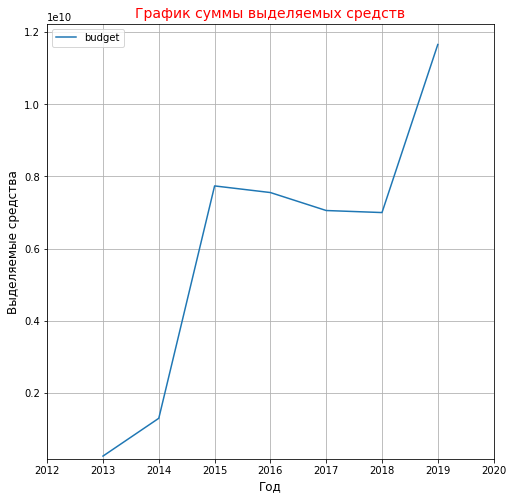

In [64]:
df_gos.pivot_table(index = 'year',
                      values = 'budget', aggfunc ='sum')\
.plot(
       grid = True,
       xlim = (2012, 2020),
       ylim = (180000000),
       figsize = (8, 8) )
plt.xlabel('Год', fontsize = 12)
plt.ylabel('Выделяемые средства', fontsize = 12)
plt.title('График суммы выделяемых средств', fontsize = 14, color = 'red')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что некоторые графики у нас повторяются.
    
Это говорит о том, что мы можем создать функцию для постоянного их построения. И с помощью этого повысить оптимизацию своего кода и презентабельность проекта в целом.
    
То есть мы можем создать "обёртки" с методами, и в функцию будем подавать нужные перменные: 
    
- датасет
- подписи графика и осей
- и прочие любые настройки
    
</div>

In [65]:
df_gos.pivot_table(index = 'year',
                      values = 'budget', aggfunc ='sum')\
.style.highlight_max(color='red')\
.highlight_min(color='blue').format("{:.2f}")

,budget
year,
2013,255435390.00
2014,1302484783.00
2015,7738669207.00
2016,7554942748.00
2017,7057172568.00
2018,7000664099.00
2019,11655866609.00


в 2013 году было выделено 255 млн руб - это был минмимум. Далее пошел рост в 2014 году 1,3 млрд и  первый максимум в 2015 году 7,7 млрд. После небольшое падение до 2018 года (7 млрд.) -  в целом ровно. И резкий рост в 2019 году до 11,65 млрд. 

Соответствует выводам в пункте 3.2. Растет количество выпускаемых фильмов, средств в целом выделяется больше - никаких противоречий. 

Рассмотрим выделяемые средства на картины по режиссерами:

In [66]:
df_gos.pivot_table(index = 'first_director',
                      values = 'ratio', aggfunc ='median').sort_values(by ='ratio', ascending = False).head(30)\
.plot(kind = 'bar',
       grid = True,
       xlim = (2015, 2020),
       figsize = (10, 10) )
plt.xlabel('Возрастная категория', fontsize = 12)
plt.ylabel('Сумма сборов', fontsize = 12)
plt.title('График суммы сборов по годам в зависимости от возрастной категории', fontsize = 14, color = 'red')

KeyError: 'first_director'

Как видим есть 13 режиссеров которые полностью профинансировало государство, далее посмотрим насколько они были успешны в прокате:

In [ ]:
df_gos.query('ratio ==100').pivot_table(index = ['first_director','payback','title']
).sort_values(by ='payback' )

Как видим из 13 картин окупились только 4 . 70 % не окупившихся картин - это очень много! 

In [ ]:
round(df_gos.loc[df_gos['ratio']== 100]['ratings'].median(),2) # средний рейтинг картин с долей госфинансирования 100%

Как видим рейтинг у картин тоже весьма посредственный.

**Вывод по разделу**

В целом можно сказать следующее:
* 1) Количество фильмов растет год к году. Однако качество этих фильмов падает;
* 2) Сумма сборов растет год к году;
* 3) Возрастной рейтинг оказывает влияние на сумму сборов картины. Самые кассовые с рейтингом "16+", думаю в эту категорию попадает большинство популярных фильмов;
* 4) Фильмы с госфинансированием имеют далеко не самые лучшие рейтинги, причем в целом, чем больше доля государства в проекте - тем ниже рейтинг. Фильмы где финансирование на 100 % окупаются лишь в 30% случаев ( при среднем рейтинге 5.7), что карйне посредственный результат.

## Общий вывод

Подводя общие итоги хочется сказать следующее:

* 1) Качество картин год к году падает. Да киностудии стремятся заработать( во всем мире), однако зачастую выходящие на экраны кинотеатров картины оставляют желать лучшего. Стоило бы больше обращать внимание на баланс качество/количество. Ведь зачастую фильмы которые долго снимались и прорабатывались становятся, по настоящему, популярными у людей. Это также положительно сказывается на сборах! Считаю лучше снять 1 реально классный фильм , чем 3 проходных, да вероятно эти 3 картины принесут по итогу большую прибыль, однако я верю, что фильмы это несколько другое, чем просто зарабатывание денег!


* 2) Фильмы на которые государство выделяет деньги нельзя назвать сильно популярными у людей, да они в целом неплохо окупаются, однако хочется думать, что Министерство культуры это не тот гос.орган в котором стоит задача зарабатывать ( разумеется траты должны быть адекватными и разумными), для этого есть другие министерства. Стоит больше внимания уделять тому, что интересно людям и на какие проекты ( и каким режиссерам) выделяются средства!

По организации хранения информации:

* 1) В целом можно скзать что исходные таблицы приличного качетсва и достаточно информативны. Однако вызывает трудности те столбцы, где появляется большое количетсво участников, как например: режиссеры ( 2 и более) , студии снимавшие ( практически везде больше 4). Это затрудняет ( если не делает ее невозможной) анализ результатов. Стоило бы организовать хранение информации с помощью реаляционных таблиц, где: студии, режиссеры, жанры, продюссеры будут хранится в отдельных таблицах и будут связяны с основной таблицей при помощи вспомогательной ( у одного фильма несколько режиссеров, как и одно режиссера несколько фильмов и т.д.) при помощи запросов можно будет проще обрабатывать информацию.

## Баг репорт

* 1) В столбце `rating` встречались значения рейтинга в процентах, при условии что киноПоиск считает рейтинг в числах. Стоит обратить на это внимание;
* 2) `box_office` столбец с информацией о сборах. Имеется только половина значений. Случайно или нет - стоит обратить на это внимание, почему так произошло.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас.
    
Хочется отметить, что мы узнали достаточно много нового в этом проекте и с уверенностью можем двигаться дальше. На что рекомендую обращать внимание , а именно на повторяемость кода. Если наши действия начинают повторяться более 2-х раз, то имеет смысл задуматься над: 
    
- внедрением цикла 
- внедрением функции
- внедрением комбинации цикл + функция
    
Такие вещи могут сразу не бросаться в глаза, но постепенно мы придём к такому подходу 😊
    
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊
    
**[общий комментарий]** Не стоит забывать про оформление своей работы, это важный такой же важный этап. Рекомендую «не стесняться» использовать ячейки типа **markdown** там где нам необходимо отобразить свои размышления, в том числе с использованием дополнительной стилизации.
    
https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet
    
    
</div>